# Visualization. 1 Relational plots

Introducción a la programación con Python.

Autor: Fernando Carazo Melo (email: fcarazo@tecnun.es)

More Info:
https://seaborn.pydata.org/api.html

## The Seaborn Package

https://seaborn.pydata.org/index.html

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:

Visualizing statistical relationships
Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:

- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

Relating variables with scatter plots
The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the scatterplot() function. In the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize categorical data. The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):

In [4]:
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

In [5]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


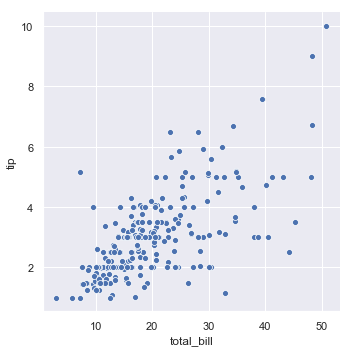

In [5]:
sns.relplot(x="total_bill", y="tip", data=tips);#  hue = "sex", hue="smoker", data=tips, s = 100 alpha = 0.3 style="time"

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

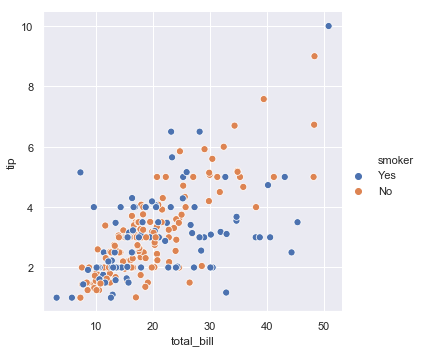

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips) 

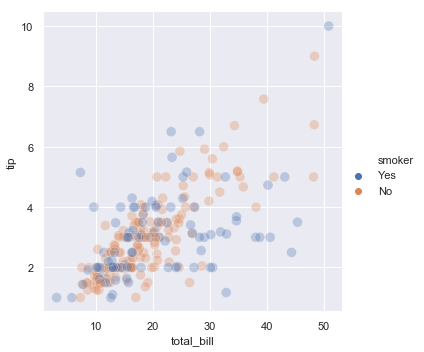

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips, s = 100, alpha = 0.3)

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

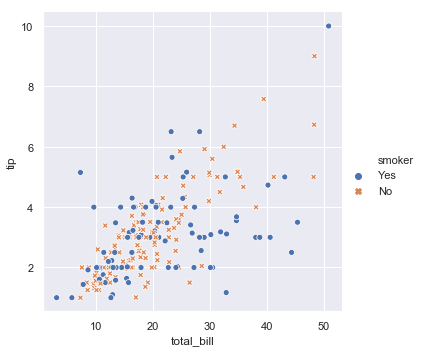

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

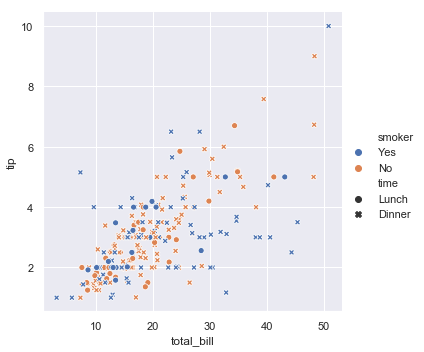

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);


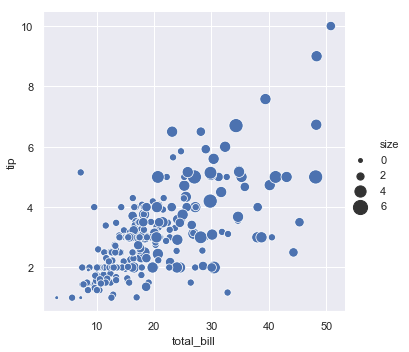

In [13]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);
# More examples for customizing how the different semantics are used to show statistical relationships are shown in the scatterplot() API examples.

Emphasizing continuity with line plots
Scatter plots are highly effective, but there is no universally optimal type of visualiation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

## Showing multiple relationships with facets
We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

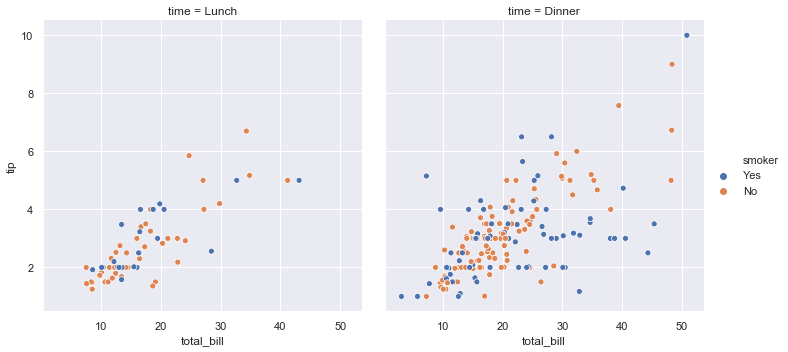

In [31]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
             data=tips);
#  col="time", You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

# Visualizing linear relationships¶


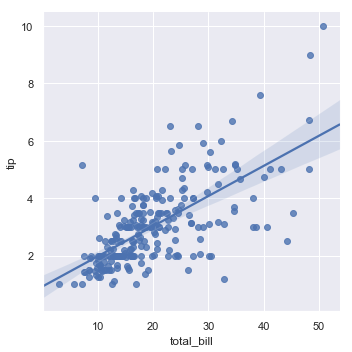

In [6]:
sns.lmplot(x="total_bill", y="tip", data=tips);

## Fitting different kinds of models¶


In [7]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


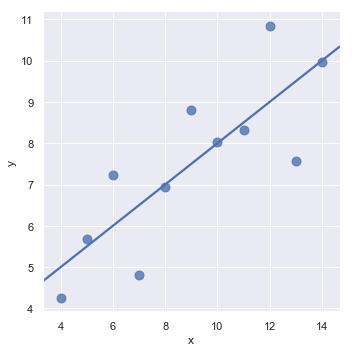

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80}); # II... robust = True

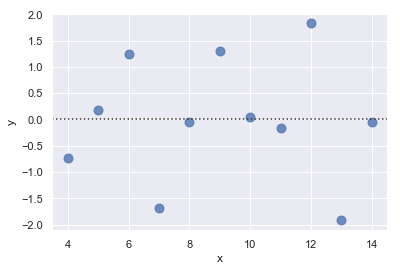

In [14]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

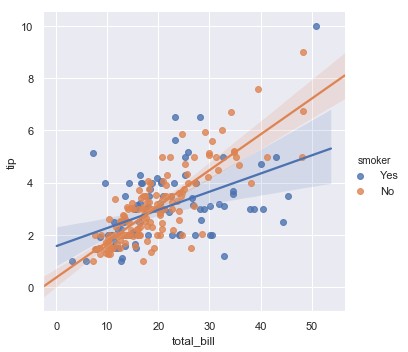

In [39]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips); #  markers=["o", "x"], palette="Set1"


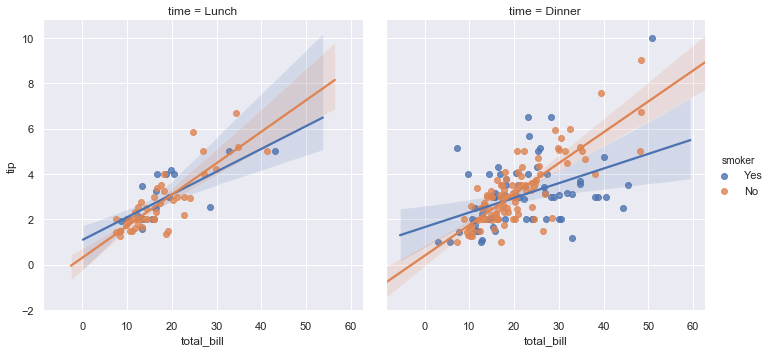

In [6]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);


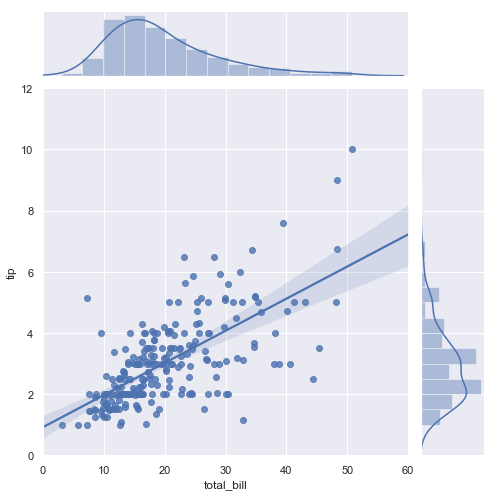

In [5]:

g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12),  height=7)